Amazon product -- laptop table reviews

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
#!python -m spacy download en_core_web_md

In [3]:
import pandas
elon=pd.read_csv("C:\ExcelR\Data Scientist\Text Mining\AMZReviews.csv",error_bad_lines=False,encoding = 'unicode_escape')

C:\Users\harsh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
elon

,Content
0,This is a good product. I saw many tables like...
1,A complete value for money product if you have...
2,Good product
3,"Due to the curve edges of stand, its not stabl..."
4,Does the Job and quality could have been bette...
5,Substandard also some orangish red color is co...
6,Really good product
7,Bought for my neice. She enjoyed .Pros: very g...
8,I liked the structure. It's handy and comfort...
9,Itâs a must have in your house if you work f...


In [5]:
elon = [Content.strip() for Content in elon.Content] # remove both the leading and the trailing characters
elon = [x for x in elon if x] # removes empty strings, because they are considered in Python as False
elon[0:10]

['This is a good product. I saw many tables like these on Amazon for different costing. But this one is amazing! I would surely recommend this. The rubber beneath is firm as well',
 'A complete value for money product if you have a laptop of around 16 inches. If the cup holder be a little deeper that would be great but still gets the job done. Overall completely satisfied with it.',
 'Good product',
 'Due to the curve edges of stand, its not stable. And the sides are edgy which makes it less uncomfortable to keep hand on the surface',
 'Does the Job and quality could have been better...',
 'Substandard also some orangish red color is coming out',
 'Really good product',
 'Bought for my neice. She enjoyed .Pros: very good for studying and multitasking (laptop,dining etc).Cons: little bit shorter in height',
 "I liked the structure. It's handy and  comfortable using. It only have a problem of steadiness. Overall it's worth the money.",
 'Itâ\x80\x99s a must have in your house if you work

In [6]:
# Joining the list into one string/text
text = ' '.join(elon)
len(text)

4669

In [7]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'This is a good product I saw many tables like these on Amazon for different costing But this one is amazing I would surely recommend this The rubber beneath is firm as well A complete value for money product if you have a laptop of around 16 inches If the cup holder be a little deeper that would be great but still gets the job done Overall completely satisfied with it Good product Due to the curve edges of stand its not stable And the sides are edgy which makes it less uncomfortable to keep hand on the surface Does the Job and quality could have been better Substandard also some orangish red color is coming out Really good product Bought for my neice She enjoyed Pros very good for studying and multitasking laptopdining etcCons little bit shorter in height I liked the structure Its handy and  comfortable using It only have a problem of steadiness Overall its worth the money Itâ\x80\x99s a must have in your house if you work from home and if you do not have a workstudy table Great for k

In [8]:
#Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['This', 'is', 'a', 'good', 'product', 'I', 'saw', 'many', 'tables', 'like', 'these', 'on', 'Amazon', 'for', 'different', 'costing', 'But', 'this', 'one', 'is', 'amazing', 'I', 'would', 'surely', 'recommend', 'this', 'The', 'rubber', 'beneath', 'is', 'firm', 'as', 'well', 'A', 'complete', 'value', 'for', 'money', 'product', 'if', 'you', 'have', 'a', 'laptop', 'of', 'around', '16', 'inches', 'If', 'the']


In [10]:
len(text_tokens)

843

In [11]:
#Remove stopwords
import nltk
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...


['This', 'good', 'product', 'I', 'saw', 'many', 'tables', 'like', 'Amazon', 'different', 'costing', 'But', 'one', 'amazing', 'I', 'would', 'surely', 'recommend', 'The', 'rubber', 'beneath', 'firm', 'well', 'A', 'complete', 'value', 'money', 'product', 'laptop', 'around', '16', 'inches', 'If', 'cup', 'holder', 'little', 'deeper', 'would', 'great', 'still']


[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['this', 'good', 'product', 'i', 'saw', 'many', 'tables', 'like', 'amazon', 'different', 'costing', 'but', 'one', 'amazing', 'i', 'would', 'surely', 'recommend', 'the', 'rubber', 'beneath', 'firm', 'well', 'a', 'complete']


In [13]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['thi', 'good', 'product', 'i', 'saw', 'mani', 'tabl', 'like', 'amazon', 'differ', 'cost', 'but', 'one', 'amaz', 'i', 'would', 'sure', 'recommend', 'the', 'rubber', 'beneath', 'firm', 'well', 'a', 'complet', 'valu', 'money', 'product', 'laptop', 'around', '16', 'inch', 'if', 'cup', 'holder', 'littl', 'deeper', 'would', 'great', 'still']


In [14]:
# NLP english language model of spacy library
nlp = spacy.load("en_core_web_sm")

#### Feature Extraction

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(stemmed_tokens)
X

<519x291 sparse matrix of type '<class 'numpy.int64'>'
	with 500 stored elements in Compressed Sparse Row format>

In [16]:
print(vectorizer.get_feature_names()[40:90])

['comfort', 'compani', 'compar', 'complet', 'connect', 'constantli', 'cost', 'could', 'cover', 'cup', 'cuphold', 'curv', 'cut', 'damag', 'day', 'decent', 'deeper', 'deliveri', 'didnt', 'differ', 'dirti', 'discount', 'dislik', 'display', 'doe', 'done', 'due', 'easi', 'easili', 'edg', 'edgesrest', 'edgi', 'els', 'enjoy', 'enough', 'etccon', 'even', 'excel', 'except', 'expect', 'extern', 'extra', 'fantasticim', 'finish', 'firm', 'first', 'fit', 'floor', 'fold', 'fool']


####  Generate wordcloud

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

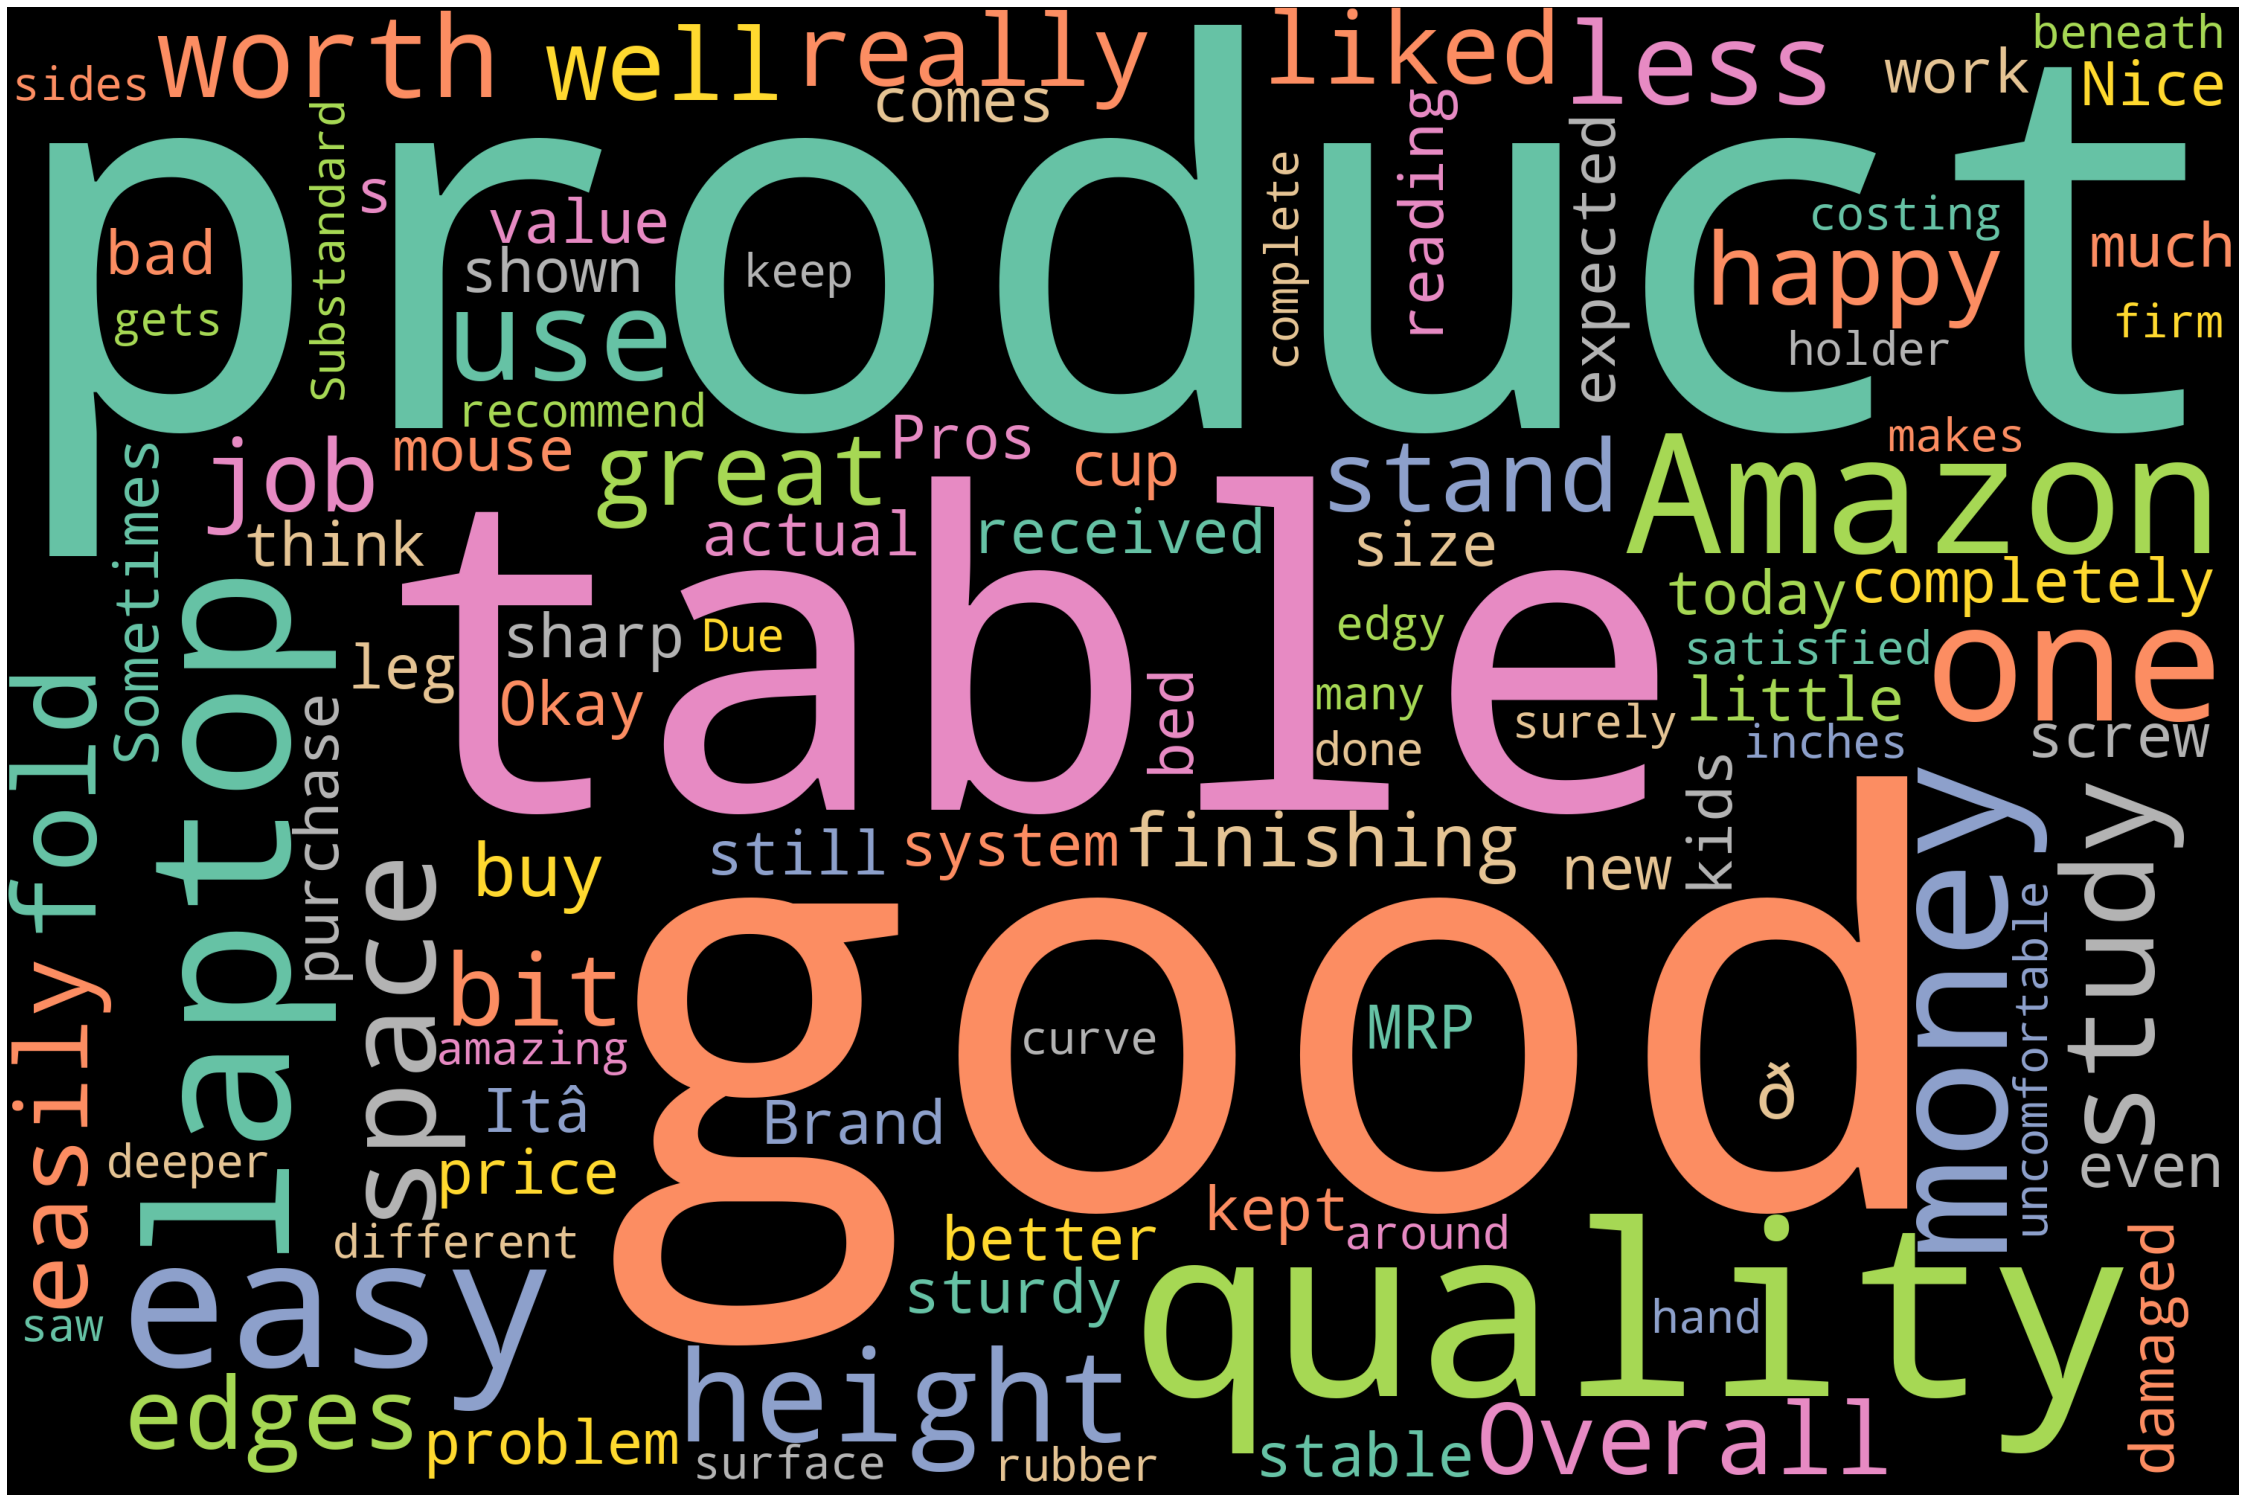

In [18]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [19]:
# positive words # Choose the path for +ve words stored in system
with open("C:\ExcelR\Data Scientist\Text Mining\positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

In [20]:
# Choosing the only words which are present in positive words
ip_pos = " ".join ([w for w in no_stop_tokens if w in poswords])

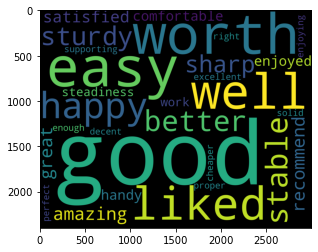

In [21]:
# Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2400
                     ).generate(ip_pos)

plt.imshow(wordcloud_pos)

In [22]:
# negative words  Choose path for -ve words stored in system
with open("C:\\ExcelR\\Data Scientist\\Text Mining\\negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [23]:
# Choosing the only words which are present in negwords
ip_neg = " ".join ([w for w in no_stop_tokens if w in negwords])

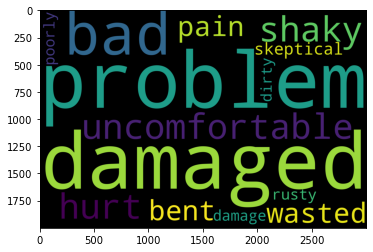

In [24]:
# negative word cloud
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(ip_neg)

plt.imshow(wordcloud_neg)